## Minimal example with TensorFlow 2.0

### Import the relefant linraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
print(tf.__version__)

2.1.0


### Data Generation

In [3]:
# First, we should declare a variable containing the size of the training set we want to generate.
observations = 1000

# We will work with two variables as inputs. You can think about them as x1 and x2 in our previous examples.
# We have picked x and z, since it is easier to differentiate them.
# We generate them randomly, drawing from an uniform distribution. There are 3 arguments of this method (low, high, size).
# The size of xs and zs is observations by 1. In this case: 1000 x 1.
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

# Combine the two dimensions of the input into one input matrix. 
# This is the X matrix from the linear model y = x*w + b.
# column_stack is a Numpy method, which combines two vectors into a matrix. Alternatives are stack, dstack, hstack, etc.
generated_inputs = np.column_stack((xs,zs))

# Check if the dimensions of the inputs are the same as the ones we defined in the linear model lectures. 
# They should be n x k, where n is the number of observations, and k is the number of variables, so 1000 x 2.
print (generated_inputs.shape)

(1000, 2)


In [4]:
# We want to "make up" a function, use the ML methodology, and see if the algorithm has learned it.
# We add a small random noise to the function i.e. f(x,z) = 2x - 3z + 5 + <small noise>
noise = np.random.uniform(-1, 1, (observations,1))

# Produce the targets according to the f(x,z) = 2x - 3z + 5 + noise definition.
# In this way, we are basically saying: the weights should be 2 and -3, while the bias is 5.
generated_targets = 2*xs - 3*zs + 5 + noise

# Save tensors into a .npz file
np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

# Check the shape of the targets just in case. It should be n x m, where m is the number of output variables, so 1000 x 1.
print (generated_targets.shape)

(1000, 1)


### Solving with TensorFlow

In [5]:
training_data = np.load('TF_intro.npz')

In [6]:
training_data

In [7]:
input_size = 2
output_size = 1

# Dense() takes inputs provided to the model and calculates the dot product of the inputs 
# and the weights and adds the bias. aslo applies activation function(optional)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size,
        kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
        bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
    )
])

# Data, model, objective function, and optimization algorithm
# SGD - stockastic Gradient Descent
# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
# https://www.tensorflow.org/api_docs/python/tf/keras/losses

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

#model.compile(optimizer='sgd', loss='mean_squared_error')
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=0)


### Extract the weights and bias

In [8]:
model.layers[0].get_weights()

[array([[ 1.9398477],
        [-3.137874 ]], dtype=float32),
 array([5.0170846], dtype=float32)]

In [9]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 1.9398477],
       [-3.137874 ]], dtype=float32)

In [10]:
bias = model.layers[0].get_weights()[1]
bias

array([5.0170846], dtype=float32)

### Extract the outputs (make predictions)

In [11]:
output_pred = model.predict_on_batch(training_data['inputs']).numpy().round(1)
output_pred

array([[-21.1],
       [ 18.6],
       [-10. ],
       [-12.6],
       [  7.3],
       [-19.3],
       [-14. ],
       [  6.4],
       [ 27.2],
       [ 13.7],
       [-14.8],
       [ 17.1],
       [ 13.6],
       [-12. ],
       [ -2.6],
       [  2.1],
       [  6.7],
       [ 30.6],
       [ -6.8],
       [-14.2],
       [ -6.6],
       [ 42.1],
       [-20.8],
       [-19.4],
       [ 32.5],
       [ 12.6],
       [ 39. ],
       [ 45.5],
       [ 35.2],
       [ 27.9],
       [ 32.2],
       [-25.4],
       [ -3.7],
       [-28.1],
       [  9.3],
       [-14.5],
       [ 19.4],
       [  7.6],
       [ 21.3],
       [ 14.9],
       [ 18.1],
       [ 12.1],
       [ -1. ],
       [ -7.2],
       [ -8.8],
       [ -1. ],
       [ 14.7],
       [-29.4],
       [ 32.9],
       [ 43.6],
       [-10.9],
       [  7.5],
       [ -7.1],
       [-36. ],
       [ 37.3],
       [  5.6],
       [ 40.3],
       [  4.5],
       [ 24.8],
       [-11.1],
       [ 32.6],
       [  8.3],
       [

In [12]:
training_data['targets'].round(1)

array([[-20.8],
       [ 19. ],
       [ -8.6],
       [-11.9],
       [  7.6],
       [-17.1],
       [-13.1],
       [  7.4],
       [ 27.6],
       [ 14.9],
       [-12.7],
       [ 15.9],
       [ 13.1],
       [-11.6],
       [ -0.8],
       [  0.6],
       [  8.2],
       [ 29.9],
       [ -5.4],
       [-15. ],
       [ -7. ],
       [ 41.8],
       [-20.6],
       [-19.5],
       [ 32. ],
       [ 12.9],
       [ 39.2],
       [ 43.8],
       [ 34.6],
       [ 27.3],
       [ 31.8],
       [-25.4],
       [ -3.8],
       [-28.1],
       [  9.3],
       [-13.2],
       [ 19.5],
       [  6.3],
       [ 20.6],
       [ 12.8],
       [ 17.4],
       [ 13. ],
       [ -1.6],
       [ -7.7],
       [ -9.1],
       [ -0.3],
       [ 15.5],
       [-27.8],
       [ 32.5],
       [ 43.3],
       [-11.8],
       [  8.9],
       [ -7.6],
       [-34.9],
       [ 35.3],
       [  3.3],
       [ 38.9],
       [  5.3],
       [ 23.4],
       [ -9.9],
       [ 32.4],
       [  8.6],
       [

### Plot the data

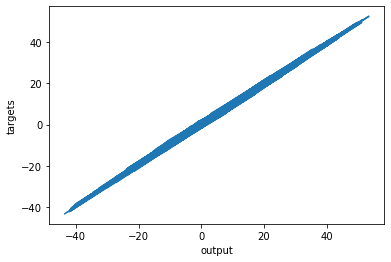

In [13]:
plt.plot(np.squeeze(output_pred), np.squeeze(training_data['targets']))
plt.xlabel('output')
plt.ylabel('targets')
plt.show()